# Jonathan Halverson
# Wednesday, July 11, 2018
# Unfair coin problem

We take a Bayesian approach to estimating the likelihood of a coin coming up heads. Here is the data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
theta_real = 0.35
N = np.array([1, 2, 3, 4, 8, 16, 32, 50, 150])
y = np.array([1, 1, 1, 1, 4, 6, 9, 13, 48])

Text(0,0.5,'y / N')

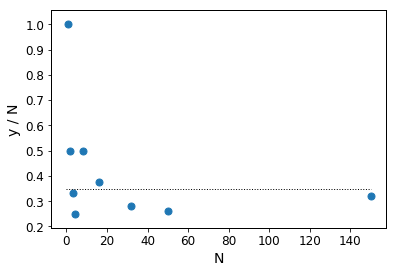

In [3]:
plt.scatter(N, y / N)
plt.plot([0, 150], [theta_real, theta_real], 'k:')
plt.xlabel('N')
plt.ylabel('y / N')

The idea is to compute the probability of theta given the data. So the prior is our guess and the posterior is the guess updated with the data:

$$P(\theta|y) \propto P(y|\theta) P(\theta)$$

The binomial distribution will be used as the likelihood. The posterior will be taken as the beta distribution which is the conjugate prior of the likelihood. The posterior is therefore also a beta distribution.

In [4]:
from scipy.stats import beta

Text(0,0.5,'P(theta)')

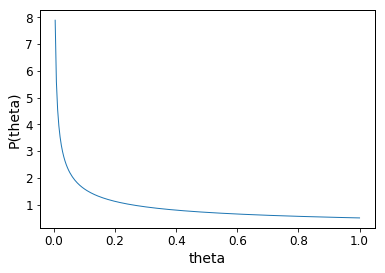

In [5]:
x = np.linspace(0, 1, num=250)
plt.plot(x, beta.pdf(x, a=0.5, b=1))
plt.xlabel('theta')
plt.ylabel('P(theta)')

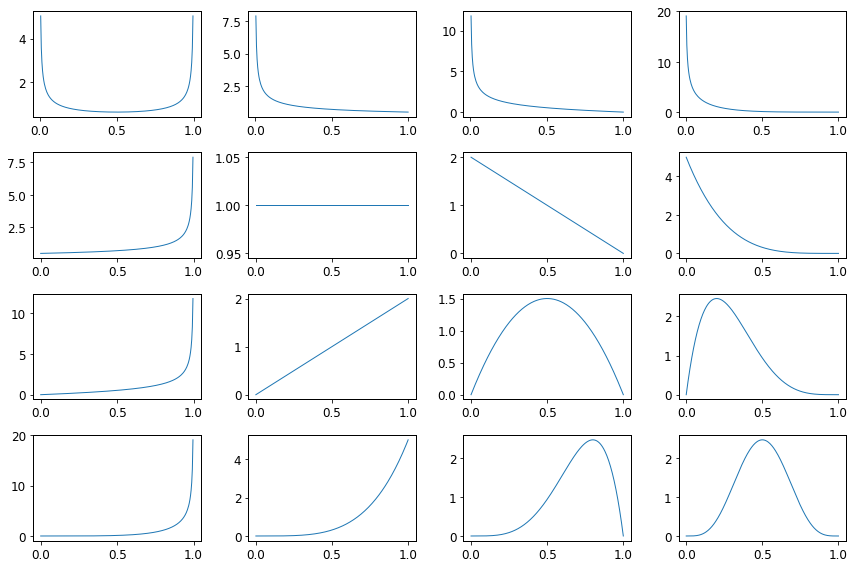

In [10]:
a = [0.5, 1.0, 2.0, 5.0]
b = [0.5, 1.0, 2.0, 5.0]
f, ax = plt.subplots(4, 4, figsize=(12, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].plot(x, beta.pdf(x, a[i], b[j]))
plt.tight_layout()

We see that the beta distribution is quite flexible is that certain parameter choices can produce a uniform, Gaussian-like, and tail-weighted distributions. The idea will be to find the optimal alpha and beta values according to the data.

In [7]:
beta_dist_params = [(2.0, 2.0), (1.0, 1.0), (0.5, 0.5), (5.0, 0.5)]

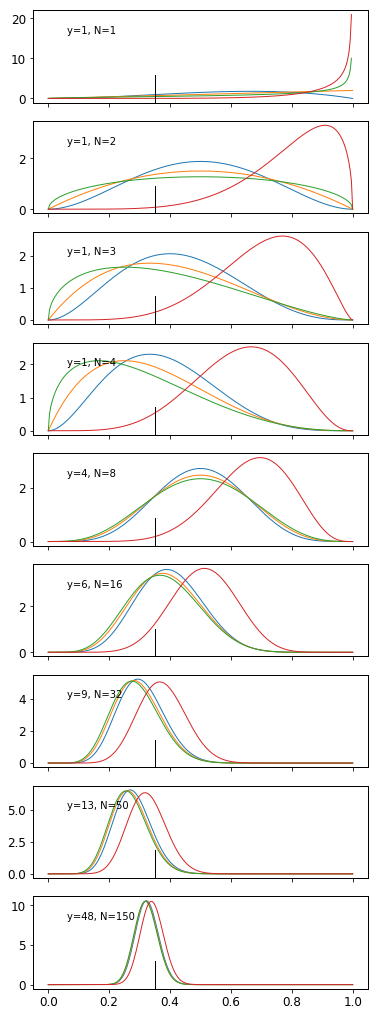

In [8]:
f, ax = plt.subplots(9, 1, sharex=True, figsize=(6, 18))
for k, (num_heads, trials) in enumerate(zip(y, N)):
    for i in range(4):
        a_, b_ = beta_dist_params[i]
        ax[k,].plot(x, beta.pdf(x, a_ + num_heads, b_ + trials - num_heads))
        ax[k,].axvline(theta_real, ymax=0.3, color='k')
        s = 'y=' + str(num_heads) + ', N=' + str(trials)
    ax[k,].text(0.1, 0.75, s, transform=ax[k,].transAxes, fontsize=10)

Let's take the final posterior as the case where we started with a uniform distribution alpha=beta=1. Let's compute the 95% highest posteriod density (HPD):

In [37]:
np.percentile(beta.rvs(a=1.0 + y[-1], b=1.0 + N[-1] - y[-1], size=10000), 2.5)

0.24903569413929064

In [38]:
np.percentile(beta.rvs(a=1.0 + y[-1], b=1.0 + N[-1] - y[-1], size=10000), 97.5)

0.3968379633950077

We can conclude that the probability of theta being between 0.25 and 0.40 is 95%.